In [ ]:
!pip install ta
!pip install pandas_ta
!pip install breeze-connect==1.0.40

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime , timedelta
import datetime
from dateutil.relativedelta import relativedelta,TH , TU
import warnings
warnings.filterwarnings('ignore')
import ta
import pandas_ta as ta
import matplotlib.pyplot as plt

import pickle
import time
import json


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="32822594")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2022-01-01T07:00:00.000Z",
                            to_date= "2023-12-30T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")

m1 =pd.DataFrame(n['Success'])
m1.index = m1.datetime
m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m1.rename( {'datetime' : 'date'} , inplace = True)
m1.dropna(inplace = True)

<Axes: xlabel='datetime'>

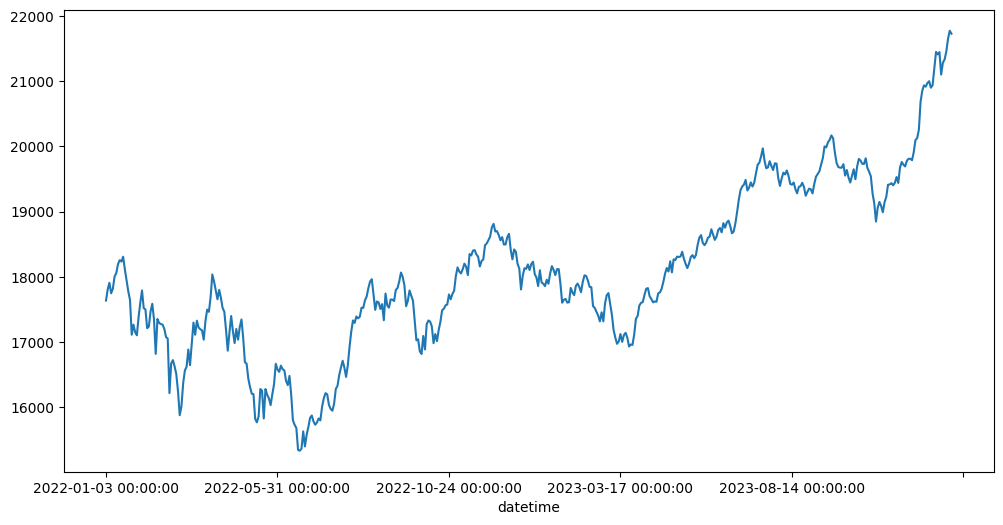

In [ ]:
m1.close.plot(figsize = (12,6))

ADF TEST BASIC YOUTUBE VIDEO

https://www.youtube.com/watch?v=warCSvy1DMk

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
adf = adfuller(m1['close'])
print('ADF Statistic: %f' % adf[0])
print('ADF p-value: %f' % adf[1])

ADF Statistic: 0.135843
ADF p-value: 0.968425


<Axes: xlabel='datetime'>

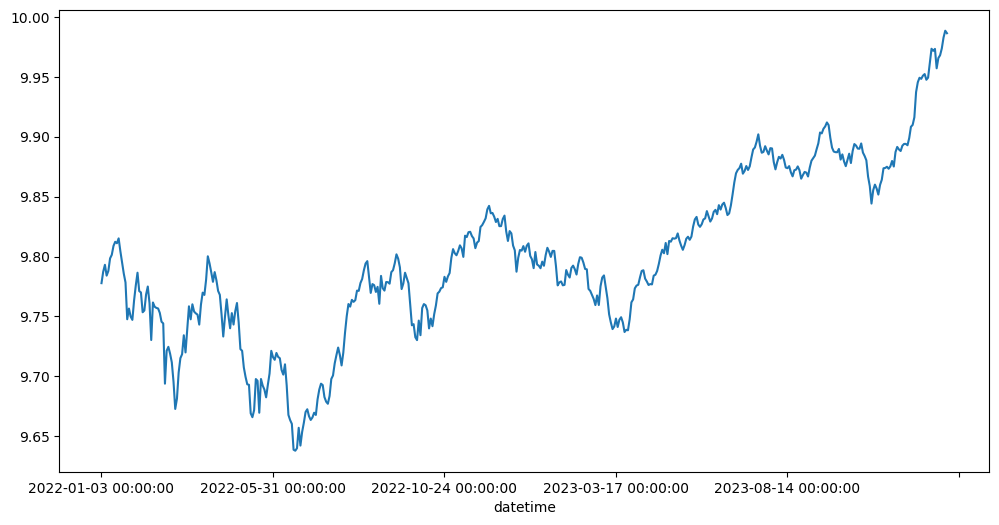

In [ ]:
np.log( m1.close ).plot(figsize = (12,6))

In [ ]:
adf = adfuller(np.log(m1['close']))
print('ADF Statistic: %f' % adf[0])
print('ADF p-value: %f' % adf[1])

ADF Statistic: -0.182288
ADF p-value: 0.940600


In [ ]:
ret_ser = m1.close - m1.close.shift(1)
ret_log_ser = np.log(m1.close) - np.log(m1.close.shift(1))

Text(0.5, 0, 'Date')

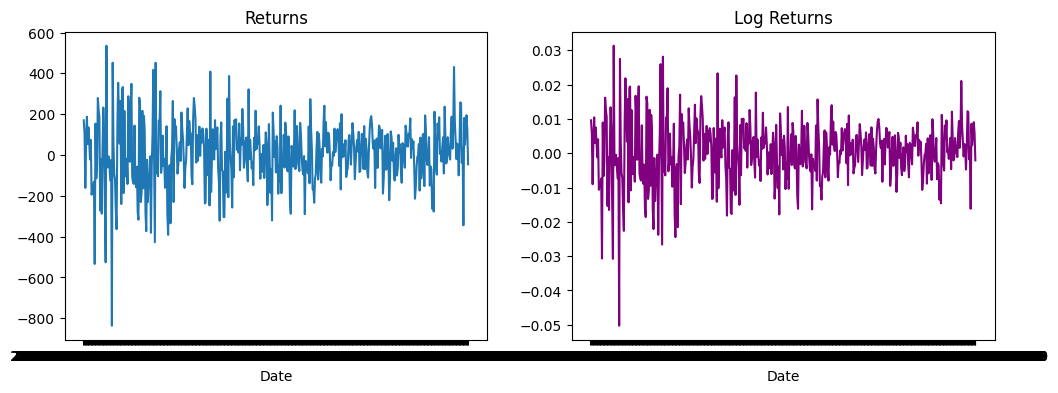

In [ ]:
fig, ax = plt.subplots( ncols = 2, figsize = (12,4))
ax[0].plot( ret_ser )
ax[0].set_title('Returns')
ax[0].set_xlabel('Date')
ax[1].plot( ret_log_ser , c = 'purple')
ax[1].set_title('Log Returns')
ax[1].set_xlabel('Date')


In [ ]:
print('returns')
ret_ser.dropna(inplace = True)
adf = adfuller( ret_ser)
print('ADF Statistic: %f' % adf[0])
print('ADF p-value: %f' % adf[1])

print('log returns')
ret_log_ser.dropna(inplace = True)
adf = adfuller(  ret_log_ser )
print('ADF Statistic : %f' % adf[0])
print('ADF p-value: %f' % adf[1])

returns
ADF Statistic: -21.370927
ADF p-value: 0.000000
log returns
ADF Statistic : -21.591699
ADF p-value: 0.000000


In [ ]:
def get_weights(d,lags):
    '''
    Return array of weights to be applied to timeseries
    '''
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)

    print(w)
    w=np.array(w).reshape(-1,1)
    return w

In [ ]:
get_weights(0.5,5)

[1, -0.5, -0.125, -0.0625, -0.0390625]


array([[ 1.       ],
       [-0.5      ],
       [-0.125    ],
       [-0.0625   ],
       [-0.0390625]])

In [ ]:
def plot_weights(ds, lags, plots):

    weights=pd.DataFrame(np.zeros((lags, plots)))
    interval=np.linspace(ds[0],ds[1],plots)

    for i, order in enumerate(interval):
        weights[i]=get_weights(order,lags)

    weights.columns = [round(x,2) for x in interval]
    print(weights)
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Differencing Order')
    plt.title('Different Differencing Orders Lag Coefficients')
    plt.xlabel('lag coefficients')
    plt.show()

[1, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
[1, -0.25, -0.09375, -0.0546875, -0.03759765625, -0.0281982421875, -0.0223236083984375, -0.018337249755859375, -0.015472054481506348, -0.013323158025741577, -0.01165776327252388, -0.010333017446100712, -0.009256661462131888, -0.008366597860003822, -0.007619580193932052, -0.0069846151777710475, -0.006438942117007684, -0.005965490490757119, -0.005551220317787875, -0.005186008454775515]
[1, -0.5, -0.125, -0.0625, -0.0390625, -0.02734375, -0.0205078125, -0.01611328125, -0.013092041015625, -0.0109100341796875, -0.009273529052734375, -0.008008956909179688, -0.0070078372955322266, -0.006199240684509277, -0.005535036325454712, -0.004981532692909241, -0.004514514002948999, -0.004116174532100558, -0.003773159987758845, -0.003475278936093673]
[1, -0.75, -0.09375, -0.0390625, -0.02197265625, -0.0142822265625, -0.0101165771484375, -0.007587432861328125, -0.005927681922912598, -0.004

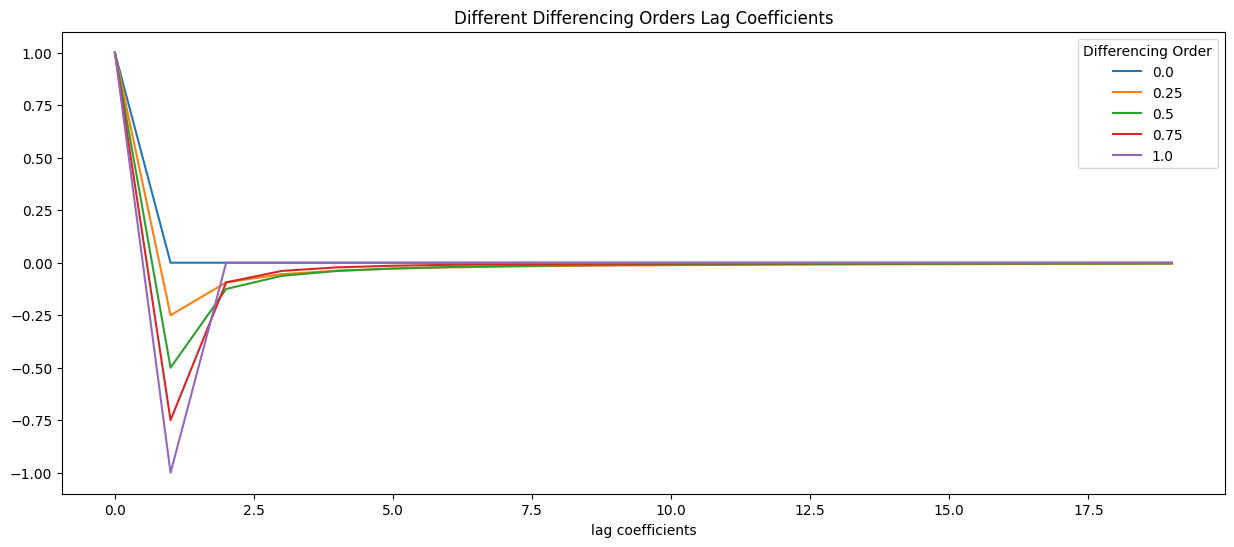

In [ ]:
plot_weights([0,1],20,5)

In [ ]:
def ts_differencing(series, order, cutoff):

    weights=get_weights(order, cutoff)
    res=0
    for k in range(cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[cutoff:]

In [ ]:
ts_differencing(m1['close'], 0.5,20)

[1, -0.5, -0.125, -0.0625, -0.0390625, -0.02734375, -0.0205078125, -0.01611328125, -0.013092041015625, -0.0109100341796875, -0.009273529052734375, -0.008008956909179688, -0.0070078372955322266, -0.006199240684509277, -0.005535036325454712, -0.004981532692909241, -0.004514514002948999, -0.004116174532100558, -0.003773159987758845, -0.003475278936093673]


datetime
2022-02-01 00:00:00    2449.519757
2022-02-02 00:00:00    2511.432147
2022-02-03 00:00:00    2116.348489
2022-02-04 00:00:00    2196.351072
2022-02-07 00:00:00    1934.103548
                          ...     
2023-12-22 00:00:00    2844.268355
2023-12-26 00:00:00    2925.168718
2023-12-27 00:00:00    3042.865997
2023-12-28 00:00:00    3044.487206
2023-12-29 00:00:00    2896.584107
Name: close, Length: 474, dtype: float64

[1, -0.7, -0.10500000000000001, -0.04549999999999999, -0.026162499999999995, -0.017267249999999994, -0.012374862499999995, -0.009369538749999995, -0.007378511765624996, -0.005984792876562497, -0.004967378087546873, -0.004199692383107811, -0.003604735962167538, -0.003133347413268706, -0.0027528695130860778, -0.0024408776349363224, -0.0021815343862243383, -0.0019633809476019043, -0.0017779505247728356, -0.0016188707409773714]


<Axes: xlabel='datetime'>

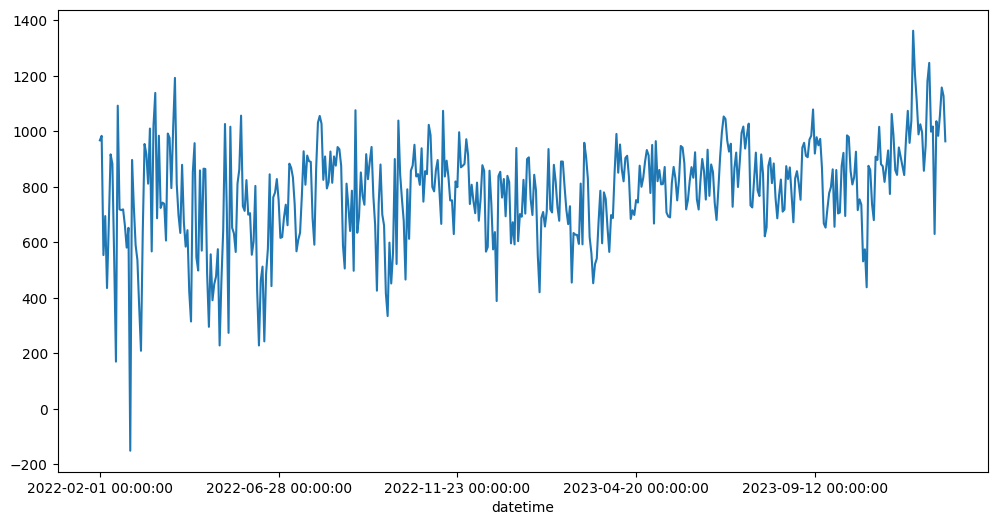

In [ ]:
ts_differencing(m1['close'], 0.7,20).plot(figsize = (12,6))

[1, -0.8, -0.07999999999999999, -0.032, -0.0176, -0.011264000000000001, -0.0078848, -0.00585728, -0.004539392000000001, -0.0036315136, -0.002977841152, -0.0024905580543999996, -0.0021169743462399995, -0.0018238548213759995, -0.0015893592014847996, -0.0013986360973066235, -0.0012412895363596282, -0.0011098588795686087, -0.0009988729916117478, -0.0009042429187222137]
[1, -0.6, -0.11999999999999997, -0.05599999999999999, -0.03359999999999999, -0.022847999999999997, -0.016755199999999998, -0.012925439999999998, -0.010340351999999999, -0.0085020672, -0.007141736447999999, -0.0061029384192, -0.005289213296640001, -0.004638233198592001, -0.0041081494044672, -0.0036699468013240326, -0.0033029521211916293, -0.0029920860391971227, -0.002726122835712934, -0.002496554596916055]
[1, -0.3999999999999999, -0.12, -0.064, -0.041600000000000005, -0.029952, -0.0229632, -0.01837056, -0.015155712, -0.012798156799999998, -0.011006414848, -0.009605598412799999, -0.00848494526464, -0.007571181928448, -0.00681

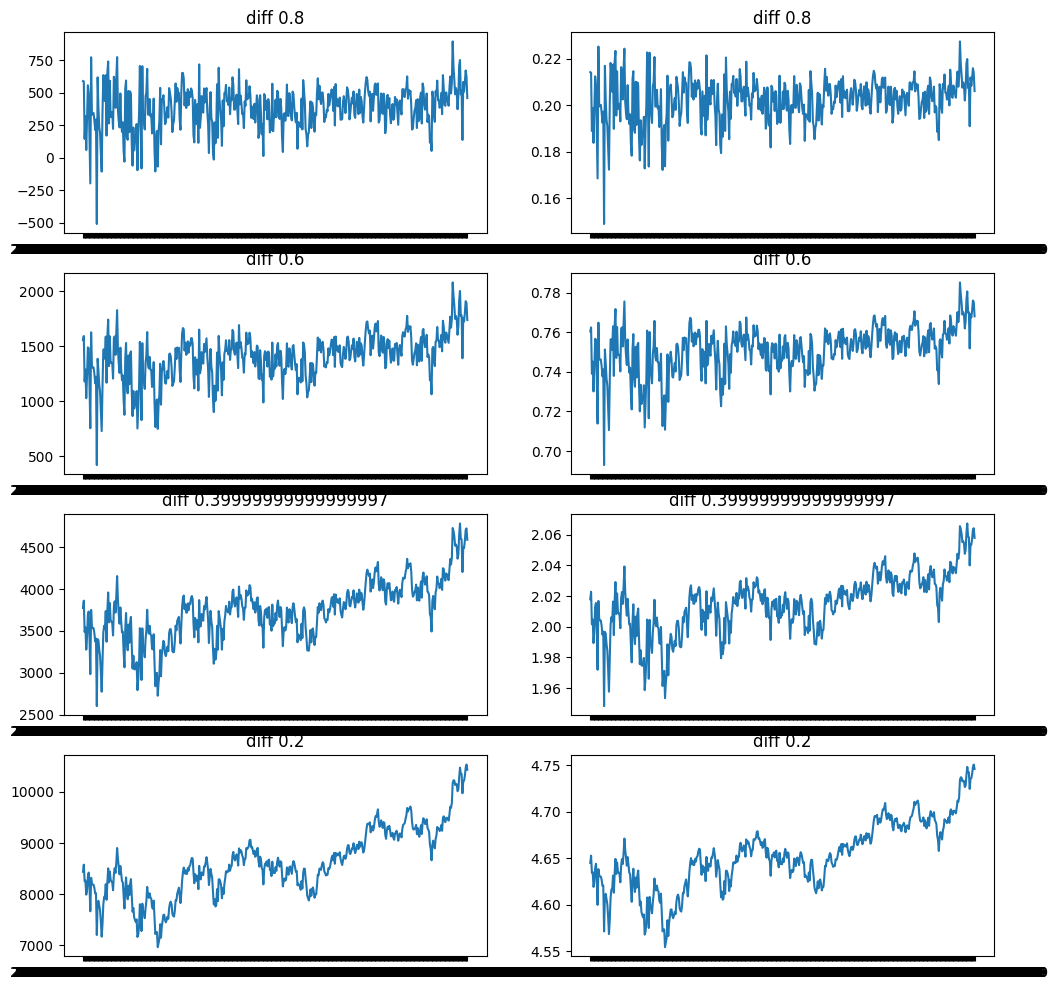

In [ ]:
fig , ax = plt.subplots(nrows = 4 , ncols = 2 , figsize = (12,12))
rows , cols = np.linspace(0,3,4).astype(int) , np.linspace(0,1,2).astype(int)
diff_ord = np.linspace(start = 0.8, stop = 0.2, num = 4)
close_ = [m1.close , np.log(m1.close) ]
for c in cols :
  for r in rows :

    ax[r][c].plot(  ts_differencing(close_[c], diff_ord[r] ,20)   )
    ax[r][c].set_title('diff {}'.format(diff_ord[r]))
    #ax[r][c].set_xlabel('Date')

In [ ]:
def get_weights(d,lags):
    '''
    Return array of weights to be applied to timeseries
    '''
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)

    #print(w)
    w=np.array(w).reshape(-1,1)
    return w

In [ ]:
def get_cutoff(order,cutoff,start):

    val=np.inf
    lags=start
    while abs(val)>cutoff:
        w = get_weights(order, lags)
        val = w[len(w)-1]
        lags += 1
    return lags

def ts_with_cutoff(series, order, cutoff):

    lag_cutoff=(get_cutoff(order,cutoff,1))
    #print(lag_cutoff)
    weights=get_weights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

In [ ]:
ds = np.divide(range(100),100)
tau = np.exp(-5)
adf_stat_holder = [None]*len(ds)
for i in range(len(ds)) :
  adf_stat_holder[i] = adfuller(ts_with_cutoff(m1['close'], ds[i], tau))[1]

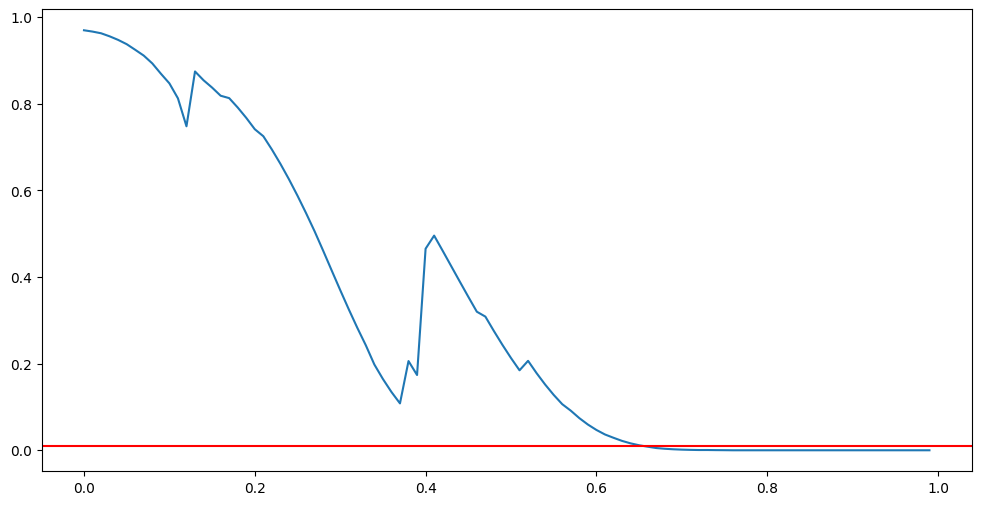

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ds,adf_stat_holder)
plt.axhline(y= 0.01 , color = 'r' )

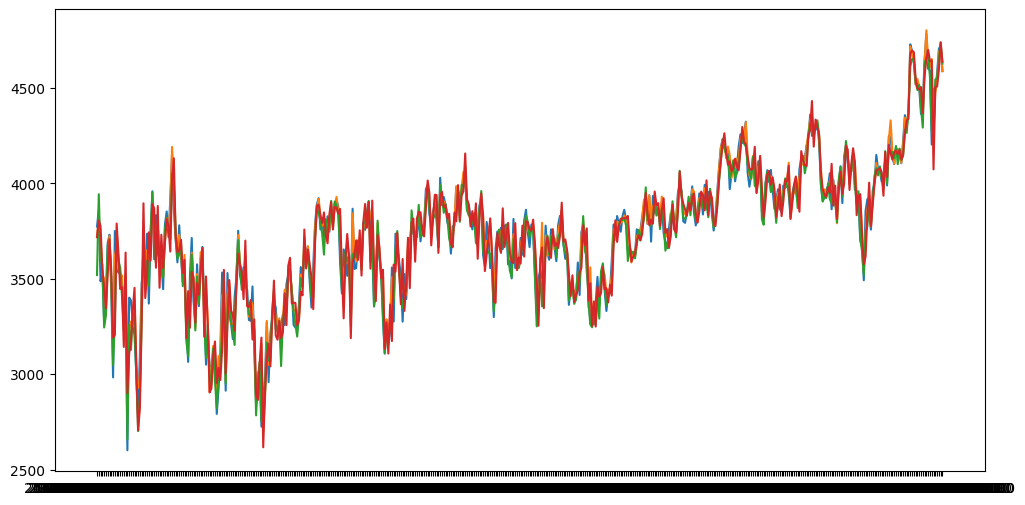

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ts_differencing(m1['close'], 0.4,20))
plt.plot(ts_differencing(m1['high'], 0.4,20))
plt.plot(ts_differencing(m1['low'], 0.4,20))
plt.plot(ts_differencing(m1['open'], 0.4,20))

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Candlestick(x = m1.index ,
                             open = ts_differencing(m1['open'], 0.6,4),
                             high = ts_differencing(m1['high'], 0.6,4) ,
                             low = ts_differencing(m1['low'], 0.6,4) ,
                             close = ts_differencing(m1['close'], 0.6,4) , name = 'market data'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intrad.supb  , line = dict( color = 'green' , width = 1) , name = 'supb'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intraday.sups  , line = dict( color = 'red' , width = 1) , name = 'sups'))
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.buy_ , mode = "markers" ,marker = dict(size = 7, color = "yellow") , name ="buy" )
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.sell_ , mode = "markers" ,marker = dict(size = 7, color = "blue") , name ="sell" )
fig.update_layout( autosize=False, width=1000, height=600)
fig.show()

**FRACTIONAL DIFFRENCING + IMBALNCE BAR OR SAMPLING OF DATA:**

In [ ]:
cols = ['close', 'high' , 'low', 'open']
dff = pd.DataFrame(columns = cols)

In [ ]:
dff['close'] = ts_differencing(m1['close'], 0.6,4)
dff['high'] = ts_differencing(m1['high'], 0.6,4)
dff['low'] = ts_differencing(m1['low'], 0.6,4)
dff['open'] = ts_differencing(m1['open'], 0.6,4)


In [ ]:
dff

,close,high,low,open
datetime,,,,
2022-01-07 00:00:00,4022.8664,4074.5204,3996.1192,4007.9296
2022-01-10 00:00:00,4181.7960,4133.7928,4143.8184,4104.5944
2022-01-11 00:00:00,4123.7884,4125.4948,4123.6532,4119.0220
2022-01-12 00:00:00,4200.4868,4214.4260,4213.2072,4225.4884
2022-01-13 00:00:00,4164.5268,4156.7528,4129.5596,4191.8852
...,...,...,...,...
2023-12-22 00:00:00,4829.3940,4821.9160,4920.0380,4887.5116
2023-12-26 00:00:00,4919.0960,4878.6664,4890.9652,4857.1800
2023-12-27 00:00:00,5024.7300,5030.2652,4977.0012,4945.1268


In [ ]:
dff['%'] = dff.close.pct_change()*100
dff['signed ticks'] = np.where(dff['%'] > 0 , 1, -1)
dff['ewma signed'] = ta.ema(dff['signed ticks'], length=10)
dff['signed ticks cumsum'] = dff['signed ticks'].cumsum()
dff.dropna(inplace = True)

In [ ]:
dff

,close,high,low,open,%,signed ticks,ewma signed,signed ticks cumsum
datetime,,,,,,,,
2022-01-20 00:00:00,3812.9424,3838.0592,3726.3920,3821.8196,-1.119952,-1,-0.400000,-4
2022-01-21 00:00:00,3812.9504,3738.2228,3737.7816,3658.7128,0.000210,1,-0.145455,-3
2022-01-24 00:00:00,3387.0444,3806.3608,3386.9716,3841.1748,-11.169985,-1,-0.300826,-4
2022-01-25 00:00:00,3886.0404,3619.7508,3551.4748,3339.2400,14.732491,1,-0.064313,-3
2022-01-27 00:00:00,3750.3380,3693.4564,3745.7204,3765.6848,-3.492048,-1,-0.234438,-4
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00,4829.3940,4821.9160,4920.0380,4887.5116,-0.416144,-1,-0.050551,-16
2023-12-26 00:00:00,4919.0960,4878.6664,4890.9652,4857.1800,1.857417,1,0.140458,-15
2023-12-27 00:00:00,5024.7300,5030.2652,4977.0012,4945.1268,2.147427,1,0.296738,-14


In [ ]:
m2 = m1.copy()

In [ ]:
m1 = dff
m1

,close,high,low,open,%,signed ticks,ewma signed,signed ticks cumsum
datetime,,,,,,,,
2022-01-20 00:00:00,3812.9424,3838.0592,3726.3920,3821.8196,-1.119952,-1,-0.400000,-4
2022-01-21 00:00:00,3812.9504,3738.2228,3737.7816,3658.7128,0.000210,1,-0.145455,-3
2022-01-24 00:00:00,3387.0444,3806.3608,3386.9716,3841.1748,-11.169985,-1,-0.300826,-4
2022-01-25 00:00:00,3886.0404,3619.7508,3551.4748,3339.2400,14.732491,1,-0.064313,-3
2022-01-27 00:00:00,3750.3380,3693.4564,3745.7204,3765.6848,-3.492048,-1,-0.234438,-4
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00,4829.3940,4821.9160,4920.0380,4887.5116,-0.416144,-1,-0.050551,-16
2023-12-26 00:00:00,4919.0960,4878.6664,4890.9652,4857.1800,1.857417,1,0.140458,-15
2023-12-27 00:00:00,5024.7300,5030.2652,4977.0012,4945.1268,2.147427,1,0.296738,-14


In [ ]:
def p_n_t (thresold_1,thresold_2) :
  if np.sign(thresold_1) == 1 :
    thresold_p = thresold_1
    thresold_n = thresold_2

  if np.sign(thresold_1) == -1 :
    thresold_n = thresold_1
    thresold_p = thresold_2


  return thresold_p ,thresold_n



m1['signed ticks 0 cumsum'] = 0
m1['sample'] = 0
m1[['thresold_ub','thresold_lb']] = 0
m1['start'] = 0
m1[['#open', '#high', '#low', '#close']] = np.nan
e_cand_size = 3
thresold_1 = m1['ewma signed'].iloc[0]*e_cand_size
thresold_2 = -m1['ewma signed'].iloc[0]*e_cand_size
thresold_p ,thresold_n=  p_n_t (thresold_1,thresold_2)
start_point = 0
cand_mark = 1
#print(thresold_p ,thresold_n)
for i in range(1,len(m1)) :

  if m1['signed ticks 0 cumsum'].iloc[i-1] > thresold_p :

    m1['sample'].iloc[i] = 1
    thresold_1 = m1['ewma signed'].iloc[i-1]*e_cand_size
    thresold_2 = -m1['ewma signed'].iloc[i-1]*e_cand_size
    thresold_p ,thresold_n=  p_n_t (thresold_1,thresold_2)
    start_point = i

    m1['thresold_ub'].iloc[i] = thresold_p
    m1['thresold_lb'].iloc[i] = thresold_n
    m1['start'].iloc[i] = start_point
    #m1[['#open', '#high', '#low', '#close']].iloc[i-1] =   [ m1['open'].iloc[cand_mark] , m1['high'].iloc[cand_mark:i].max(),  m1['low'].iloc[cand_mark:i].min(),m1['close'].iloc[i-1] ]
    m1['#open'].iloc[i-1] =   m1['open'].iloc[cand_mark]
    m1['#high'].iloc[i-1] =   m1['high'].iloc[cand_mark:i].max()
    m1['#low'].iloc[i-1] =    m1['low'].iloc[cand_mark:i].min()
    m1['#close'].iloc[i-1] =  m1['close'].iloc[i-1]
    cand_mark = i
  if m1['signed ticks 0 cumsum'].iloc[i-1] < thresold_n :
    m1['sample'].iloc[i] = 1
    thresold_1 = m1['ewma signed'].iloc[i-1]*e_cand_size
    thresold_2 = -m1['ewma signed'].iloc[i-1]*e_cand_size
    thresold_p ,thresold_n=  p_n_t (thresold_1,thresold_2)
    start_point = i

    m1['thresold_ub'].iloc[i] = thresold_p
    m1['thresold_lb'].iloc[i] = thresold_n
    m1['start'].iloc[i] = start_point
    #m1[['#open', '#high', '#low', '#close']].iloc[i-1] =   [ m1['open'].iloc[cand_mark] , m1['high'].iloc[cand_mark:i].max(),  m1['low'].iloc[cand_mark:i].min(),m1['close'].iloc[i-1] ]
    m1['#open'].iloc[i-1] =   m1['open'].iloc[cand_mark]
    m1['#high'].iloc[i-1] =   m1['high'].iloc[cand_mark:i].max()
    m1['#low'].iloc[i-1] =    m1['low'].iloc[cand_mark:i].min()
    m1['#close'].iloc[i-1] =  m1['close'].iloc[i-1]
    cand_mark = i
  if  thresold_n  <= m1['signed ticks 0 cumsum'].iloc[i-1]  <=   thresold_p   :

    m1['sample'].iloc[i] = 0
    m1['thresold_ub'].iloc[i] = thresold_p
    m1['thresold_lb'].iloc[i] = thresold_n
    m1['start'].iloc[i] = start_point

    #print(   len(m1['signed ticks'][start_point+1:i+1].cumsum())  )
    if  len(m1['signed ticks'][start_point+1:i+1].cumsum())  != 0 :
      m1['signed ticks 0 cumsum'].iloc[i] = m1['signed ticks'][start_point+1:i+1].cumsum()[-1]

    if  len(m1['signed ticks'][start_point+1:i+1].cumsum())  == 0 :
      m1['signed ticks 0 cumsum'].iloc[i] = m1['signed ticks'].iloc[i]


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
fig1 = go.Figure()
fig1.add_trace(go.Candlestick(x = m1.index ,
                             open = m1['#open'],
                             high = m1['#high'] ,
                             low = m1['#low'] ,
                             close = m1['#close'] , name = 'market data'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intrad.supb  , line = dict( color = 'green' , width = 1) , name = 'supb'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intraday.sups  , line = dict( color = 'red' , width = 1) , name = 'sups'))
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.buy_ , mode = "markers" ,marker = dict(size = 7, color = "yellow") , name ="buy" )
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.sell_ , mode = "markers" ,marker = dict(size = 7, color = "blue") , name ="sell" )
fig1.update_layout( autosize=False, width=1000, height=600)
fig1.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
fig1 = go.Figure()
fig1.add_trace(go.Candlestick(x = m1.index ,
                             open = m2['open'],
                             high = m2['high'] ,
                             low = m2['low'] ,
                             close = m2['close'] , name = 'market data'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intrad.supb  , line = dict( color = 'green' , width = 1) , name = 'supb'))
#fig.add_trace(go.Scatter(x= m1.index , y = nifty_intraday.sups  , line = dict( color = 'red' , width = 1) , name = 'sups'))
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.buy_ , mode = "markers" ,marker = dict(size = 7, color = "yellow") , name ="buy" )
#fig.add_scatter (x = nifty_intraday.index , y= nifty_intraday.sell_ , mode = "markers" ,marker = dict(size = 7, color = "blue") , name ="sell" )
fig1.update_layout( autosize=False, width=1000, height=600)
fig1.show()

In [ ]:
m1[['#close', '#high', '#low', '#open']]

,#close,#high,#low,#open
datetime,,,,
2022-01-20 00:00:00,NaN,NaN,NaN,NaN
2022-01-21 00:00:00,NaN,NaN,NaN,NaN
2022-01-24 00:00:00,NaN,NaN,NaN,NaN
2022-01-25 00:00:00,NaN,NaN,NaN,NaN
2022-01-27 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-12-22 00:00:00,NaN,NaN,NaN,NaN
2023-12-26 00:00:00,4919.0960,4878.6664,4890.9652,4887.5116
2023-12-27 00:00:00,NaN,NaN,NaN,NaN


In [ ]:
m1[['#close', '#high', '#low', '#open']].dropna()

,#close,#high,#low,#open
datetime,,,,
2022-01-31 00:00:00,4095.7676,4001.3356,3386.9716,3658.7128
2022-02-02 00:00:00,4185.2176,4159.0440,3892.2700,4128.3520
2022-02-09 00:00:00,4082.3360,4014.7420,3550.7432,4071.6372
2022-02-14 00:00:00,3323.4664,4094.3280,3365.6080,4080.9052
2022-02-16 00:00:00,3890.9852,4036.1940,3701.1796,3610.4104
...,...,...,...,...
2023-12-15 00:00:00,5048.6336,5072.0324,4569.0892,4630.4744
2023-12-19 00:00:00,4838.7420,4869.9576,4790.1884,4957.0160
2023-12-21 00:00:00,4849.5752,4908.0080,4532.3600,4892.6368


<Axes: xlabel='datetime'>

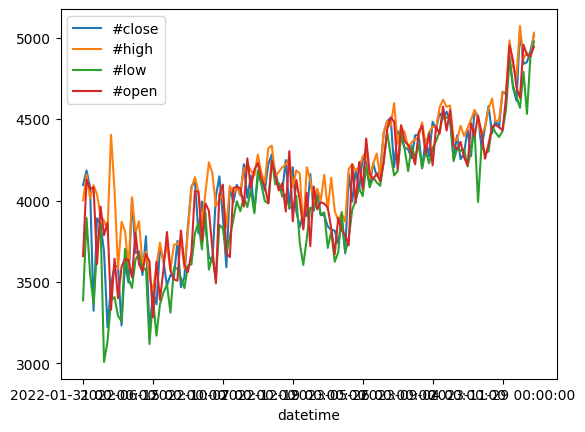

In [ ]:
m1[['#close', '#high', '#low', '#open']].dropna().plot()